### Exploratory Data Analysis

In [7]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore")

In [8]:
# Read train data
train_data = pd.read_csv("../data/train_v9rqX0R.csv")

#### Summary Statistics

In [10]:
# Overall stats
print("No. of Items: ",len(train_data["Item_Identifier"].unique()))
print("No. of Item_Fat_Content: ",len(train_data["Item_Fat_Content"].unique()))
print("No. of Item_Type: ",len(train_data["Item_Type"].unique()))
print("No. of Outlet_Identifier: ",len(train_data["Outlet_Identifier"].unique()))
print("No. of Outlet_Size: ",len(train_data["Outlet_Size"].unique()))
print("No. of Outlet_Location_Type: ",len(train_data["Outlet_Location_Type"].unique()))
print("No. of Outlet_Type: ",len(train_data["Outlet_Type"].unique()))

No. of Items:  1559
No. of Item_Fat_Content:  5
No. of Item_Type:  16
No. of Outlet_Identifier:  10
No. of Outlet_Size:  4
No. of Outlet_Location_Type:  3
No. of Outlet_Type:  4


In [11]:
# Metrics - stats
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
# Missing values for each column
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Findings
##### 1. Missing values are present in Item Weight and Outlet Size which need to be treated
##### 2. Item Visibility has values as 0 which is not possible and needs to be treated

#### Analysis of Numeric Metrics

In [15]:
def show_distplot(data,metric):
    sns.distplot(data[metric], kde=True)

In [16]:
def show_box_plot(data, x_axis,y_axis):
    # Create the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_axis, y=y_axis, data=data)
    
    # Add titles and labels
    # plt.title('Box Plot by '+x_axis)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    # Show the plot
    plt.show()

##### Sales

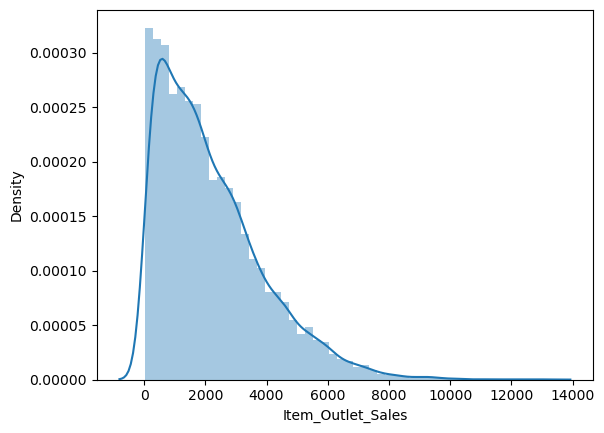

In [18]:
# Probability desnsity plot
show_distplot(train_data,metric="Item_Outlet_Sales")

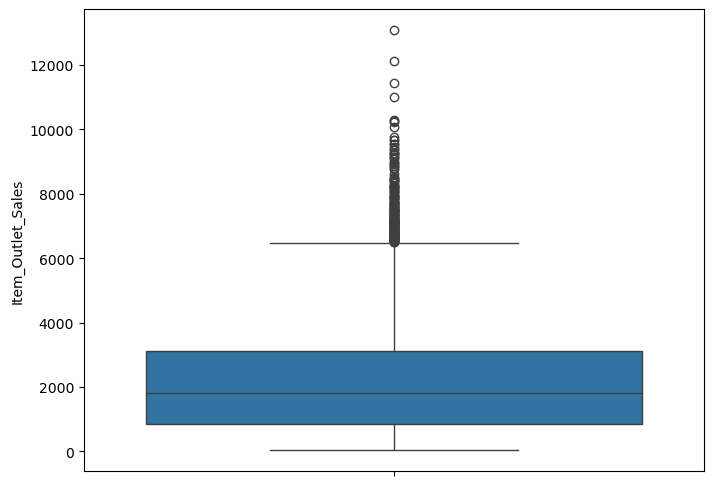

In [19]:
# Box plot
show_box_plot(train_data, x_axis=None, y_axis='Item_Outlet_Sales')

##### Outliers can be observed in the sales data which need to be treated

##### Item Weight

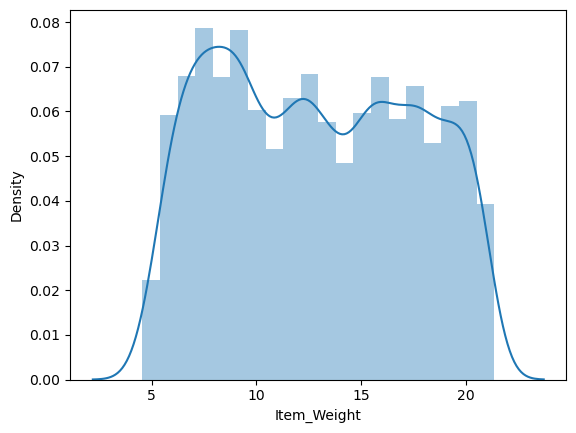

In [22]:
# Probability desnsity plot
show_distplot(train_data,metric="Item_Weight")

##### Item Visibility

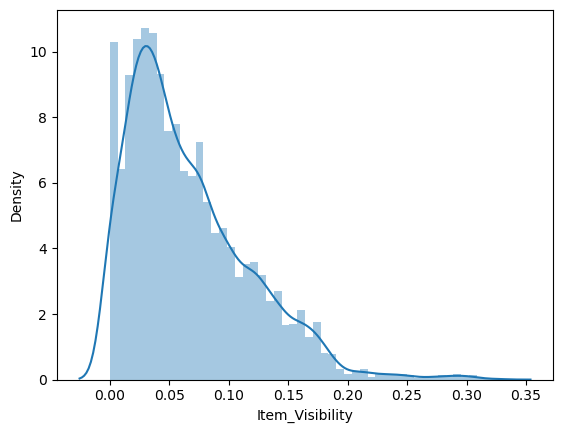

In [24]:
# Probability desnsity plot
show_distplot(train_data,metric="Item_Visibility")

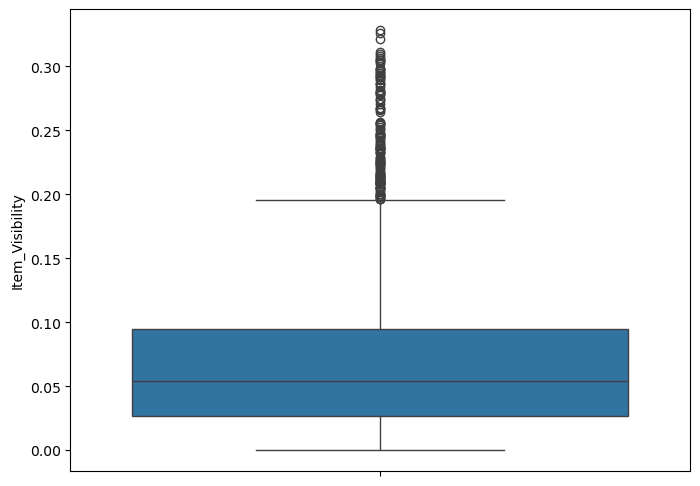

In [25]:
# Box plot
show_box_plot(train_data, x_axis=None, y_axis='Item_Visibility')

##### Outliers can be observed in the Item Visibility data which need to be treated

##### Item MRP

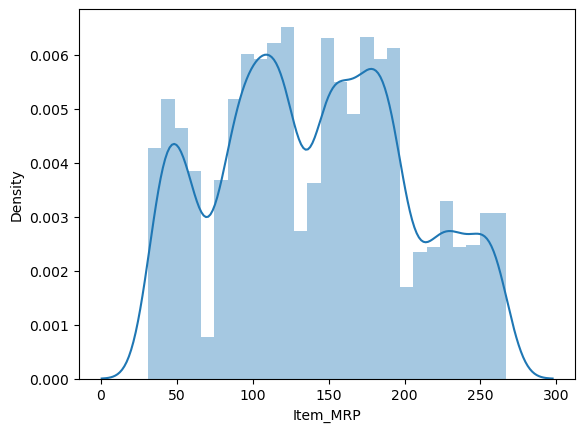

In [28]:
# Probability density plot
show_distplot(train_data,metric="Item_MRP")

#### Sales distribution across categories

##### Outlet Type

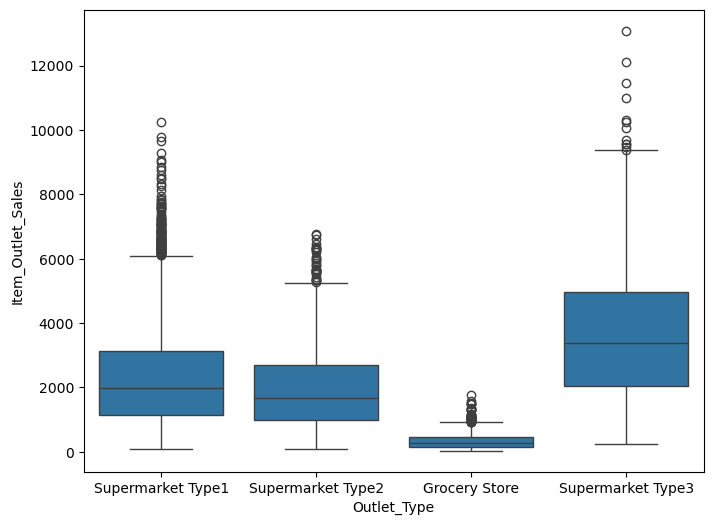

In [31]:
# Box plot
show_box_plot(train_data, x_axis='Outlet_Type', y_axis='Item_Outlet_Sales')

##### Sales distribution is much lower for Grocery Store compared to others. A different model for Grocery Store could be useful

##### Outlet Location Type

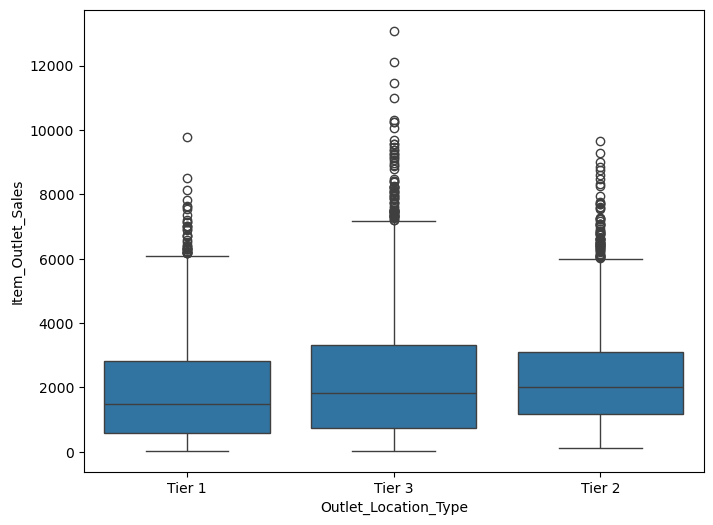

In [34]:
# Box plot
show_box_plot(train_data, x_axis='Outlet_Location_Type', y_axis='Item_Outlet_Sales')

##### Item Category

In [36]:
# Extract item category from item ID
train_data["Item_Category"] = train_data["Item_Identifier"].str[0:2]

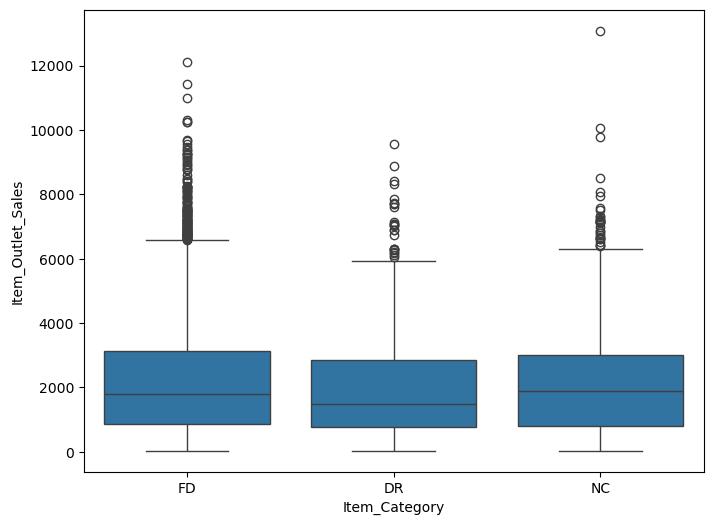

In [37]:
# Box plot
show_box_plot(train_data, x_axis='Item_Category', y_axis='Item_Outlet_Sales')

##### Item Type

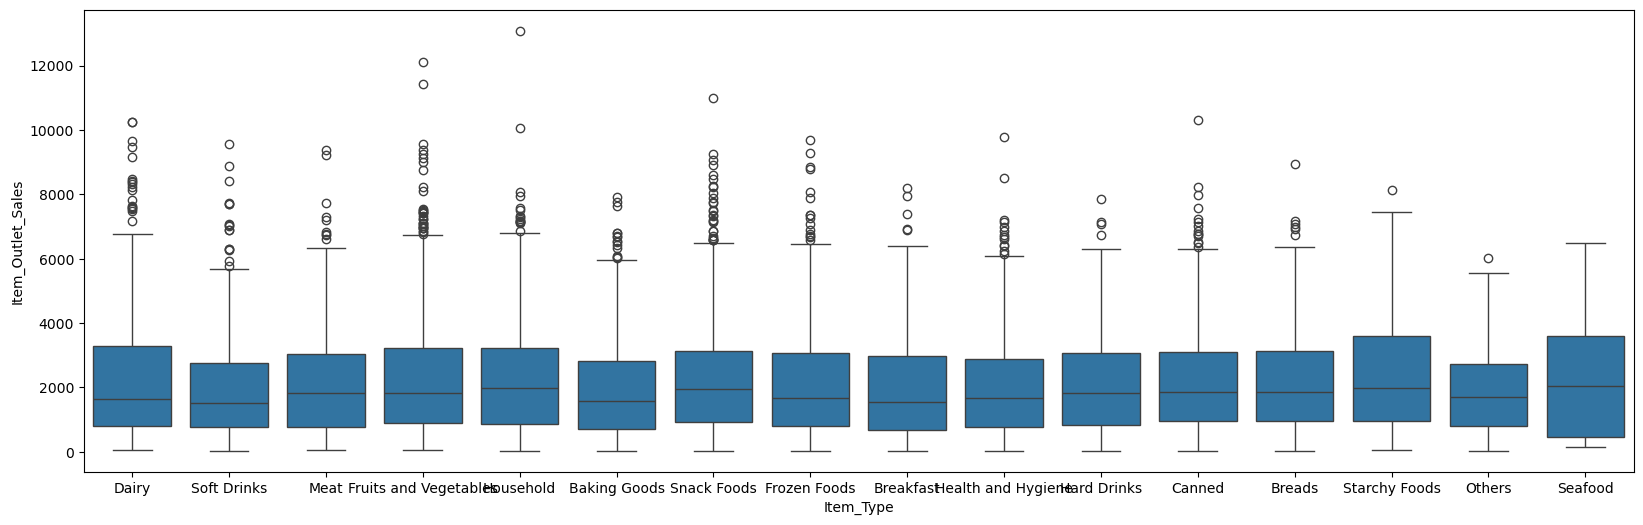

In [39]:
# Create the box plot
plt.figure(figsize=(20, 6))
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=train_data)
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.show()

##### Store - Active Years

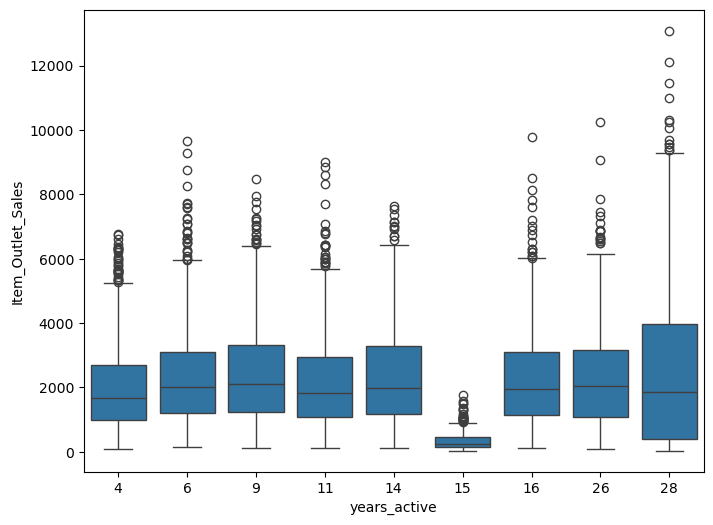

In [62]:
# Box plot of sales distribution by store active years
current_year = 2013
train_data["years_active"] = current_year - train_data["Outlet_Establishment_Year"]

show_box_plot(train_data, x_axis='years_active', y_axis='Item_Outlet_Sales')

##### The oldest store(28 years active) has the highest range of sales distribution and can be considered to be encoded in the model

##### Finding: Apart from Outlet Type, the Sales distribution looks fairly similar across other categories